In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Tarea

### Ejercicios en clase

Eddson Sierra

13/03/2021

## EJERCICIO 1

**ejercicio**: en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diference espaciamiento ,por ejemplo:

[0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ]
       
El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

**nota**: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de numpy

In [2]:
# tu codigo aqui (~ 5 lineas de codigo):
a = np.arange(0,5,1)/10
b = np.arange(0.5,0.6,0.01)
c = np.arange(6,11,1)/10
xs = np.hstack((np.hstack((a,b)),c))
print(xs)

[0.   0.1  0.2  0.3  0.4  0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58
 0.59 0.6  0.7  0.8  0.9  1.  ]


## EJERCICIO 2

**Ejemplo aplicado a DS** :  Suavizado de curvas a través de promedios de n-puntos(medias móviles):

<img src="https://www.luisllamas.es/wp-content/uploads/2017/03/arduino-filtro-media-movil-ventana-5.png">

En el mundo la data comunmente posee "ruido" por lo cual muchas veces antes de hacer análisis o modelado se necesita "suavizar" las curvas para reducir este ruido, una técnica muy sencilla es  el suavizado por promedio de n-puntos(también llamado media móvil), esto significa que para cada punto Xn obtenemos una versión transformada(suavizada) que consiste en promediar n puntos cercanos a el, por ejemplo para n= 3 tenemos que:

$$XS_{n}  =  \frac{X_{n-1}+X_{n}+X_{n+1}}{3}$$

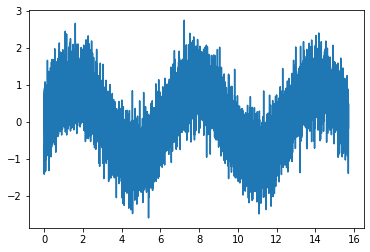

10000


In [3]:
# las siguientes 3 lineas generan un conjunto de datos que se comportan segun una onda senoidal pero tienen
# ruido por lo cual vamos a suavizar usando promedio de 3 puntos
# en este ejercicio los generamos manualmente pero pensemos que son datos que pudieron ser generados con algún
# instrumento como un sensor, o bien estar almacenados en una base de datos
z = 3
sample_points = 10000
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,5*np.pi,sample_points) 
y = np.sin(x) + ruido

plt.plot(x,y)
plt.show()
print(len(y))

#ys es "y suavizado", inicialmente es una copia de y
ys =  y.copy()

for n in range(1,len(y)-1): 
#comienza en 1 porque no hay elemento anterior a cero y termina en el penultimo porque no hay elemento luego del último
    ys[n] = (y[n-1] + y[n] + y[n+1])/z

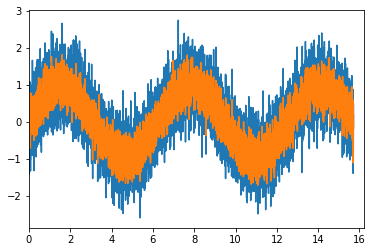

In [4]:
plt.plot(x,y)
plt.plot(x,ys)
plt.xlim(0,5*np.pi + 0.5)
plt.show()

**Ejercicio (parte de tarea)** En este caso usamos un ciclo  para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar  código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for. 

**tip**: usar slicing

In [5]:
sumacum = np.cumsum(np.insert(y,0,0))
ys2 = (sumacum[z:] - sumacum[:-z]) / z
print(ys2)
print(ys[1:-1])

[-0.43968577 -0.13556824  0.49250452 ... -0.23164347  0.05976248
  0.21466822]
[-0.43968577 -0.13556824  0.49250452 ... -0.23164347  0.05976248
  0.21466822]


## EJERCICIO 3

#### Ejemplos en DS:

**1)**
En machine learning se necesita una manera de "evaluar" nuestros modelos ,en ML del tipo "supervisado" para modelos de variables discretas categóricas  usamos  para esto  la "entropía cruzada" que mide la diferencia  entre 2 distribuciones de probabilidad,la que nuestro modelo predice vs la real obtenida de datos **ground truth** , una entropía cruzada alta es un modelo de ML malo y una entropía cruzada de 0 es un modelo de ML perfecto.

La entropía medida en bits(ojo,no cruzada, solo entropía) se define como "el promedio de información"(promedio ponderado) y la información se define se define como el negativo del logaritmo base 2 de la probabilidad . 

$$I(x) = -log_{2}P(x)$$

**Comentario**:La entropía es una medida de "incerteza", si un evento puede producir muchos resultados diferentes entonces tenemos una alta incerteza del evento lo cual se traduce a entropía alta.

La siguiente función calcula para cierta distribución de probabilidad dada por un vector px la información de cada elemento.

In [6]:
def calcular_informacion(px):
    return np.log2(px)*-1

distribucion_prob1 = [1.0]
distribucion_prob2 = [0.5,0.5] # la entropia es maxima cuando todos tienen la misma prob
distribucion_prob3 = [1.0,0.0]
distribucion_prob4 = [0.9999]
distribucion_prob5 = [0.25,0.75]
distribucion_prob6 = [0.2]*5 # ojo estas son listas por lo tanto * la replica, no son arrays de numpy
distribucion_prob7 = [0.4,0.2,0.1,0.1,0.2]

print(calcular_informacion(distribucion_prob1))
print(calcular_informacion(distribucion_prob2))
print(calcular_informacion(distribucion_prob3))
print(calcular_informacion(distribucion_prob4))
print(calcular_informacion(distribucion_prob5))
print(calcular_informacion(distribucion_prob6))
print(calcular_informacion(distribucion_prob7))

[-0.]
[1. 1.]
[-0. inf]
[0.00014428]
[2.        0.4150375]
[2.32192809 2.32192809 2.32192809 2.32192809 2.32192809]
[1.32192809 2.32192809 3.32192809 3.32192809 2.32192809]


<ipython-input-6-49f564e03e90>:2: RuntimeWarning: divide by zero encountered in log2
  return np.log2(px)*-1


**Ejercicio** Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5    ,    0.31127812]

**Nota**: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

In [7]:
## EJERCICIO ENTREGABLE
# tu codigo aqui (~ 4 lineas de codigo)
def calcular_entropia(px):
    return np.log2(px)*px*-1

In [8]:
calcular_entropia([0.25,0.75])

array([0.5       , 0.31127812])

## EJERCICIO 4

A partir de la información en un data warehouse con un modelo de  datos el valor de clientes en el tiempo se ha determinado un modelo predictivo  no lineal que estima cuanta ganancia ha generado cierto cliente en 5 años en base a lo que ha gastado en su primer mes como cliente. 

El modelo tiene la forma:

$$g(x) = (x^{3} + 2x^{2} + e^{0.0001x} -\sqrt{2x})/50$$

Crear una función que calcule la ganancia para valores de gasto de nuevos clientes:

In [9]:
def g(x):
    
    ganancia = (np.power(x,3) + 2.0*(np.power(x,2.0))+np.exp(0.0001*x) - np.sqrt(2.0*x))/50
    
    return ganancia
    
gastos = np.array([100,50,25,100])
ganancia = g(gastos)

print("Ganancias",ganancia)

Ganancias [20399.73735829  2599.82010025   337.37862871 20399.73735829]


**Ejercicio** : se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
$$c(x) = (x^{2} + x + log (0.0001x)-\sqrt{0.54x})/100$$

Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función  **ganancia_neta(x,g,c)** donde:
* x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
* g = función que estima la ganancia en función de x
* c = función que estima el costo en función de x

La función realiza el calculo simple **g(x) - c(x)** , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.

In [10]:
def c(x):
    costo = (np.power(x,2) + x + np.log(0.0001*x) - np.sqrt(0.54*x))/100
    return costo

def ganancia_neta(x,g,c):
    return g(x)-c(x)

In [11]:
x = np.array([100,50,25,100]) #gastos
ganancia_neta(x,g,c)

array([20298.85689469,  2574.42504495,   330.9752857 , 20298.85689469])

## EJERCICIO 5

**Ejercicio** Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

**tip** investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

In [12]:
from collections import Counter
x = np.array([20,100,50,25,100])

def mode(x):
    ## tu codigo aqui (~ 3 lineas de codigo):
    a = Counter(x)
    maximo = x[np.argmax(x)]
    return (maximo,a[maximo])
print(mode(x))

(100, 2)


## EJERCICIO 6

**Ejercicio** : crear una función para calcular la entropía  de una distribución de probabilidad representada como un vector.
$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

**Nota**: a diferencia del ejercicio anterior donde solo calculamos los términos de la entropía, en este caso  si calculamos el valor completo de la entropía, que como mencionamos es una medida de incerteza en una distribución de probabilidad.

**recordatorio**: no usar ciclos solo operaciones vectorizadas.

In [13]:
# tu codigo aqui (~ 3 lineas de codigo)
def s(px):
    return np.sum(np.log2(px)*px*-1)

In [14]:
distribucion_prob8 = np.arange(10,50,2)
s(distribucion_prob8)

-2887.453474725681

## EJERCICIO 7

**Ejercicio**: En ML usamos la entropía cruzada como una forma de medir que tan bueno es un modelo de variables discretas a través de comparar la distribución de probabilidad que el modelo produce o predice, vs la distribución de probabilidad real dada por los datos de entrenamiento.

Podemos ver el siguiente ejemplo que define la forma en que se calcula la entropía cruzada y nos muestra un caso específico:

<img src="https://image.slidesharecdn.com/publishintroductiontodeeplearninginpythonandmatlab1-160502102437/95/introduction-to-deep-learning-in-python-and-matlab-54-638.jpg?cb=1462185644">

En este caso interpretamos así: El problema consiste en un modelo o algoritmo de ML que debe producir un vector de 3 elementos indicando la probabilidad de que ciertos datos X pertenezcan a una de 3 categorías.

* El modelo de ML produce un vector que indica que estima un 70% de probabilidad de que se trate de la categoría 0, 20% de probabilidad de que se trate de la categoría 1 y 10% de que se trate de la categoría 2.
* Los datos reales nos dicen que se trataba de un caso donde con total certeza se sabe que se trata de la categoría 0
* La entropía cruzada(a calcular en el ejercicio) nos indica que tan buena es la estimación del modelo, una EC de 0 es un modelo perfecto(en este caso un modelo que predice 100% de prob para la clase 0)

**Nota** 
* Aun que para calcular la entropía usamos logaritmos en base 2, en ML para calcular la entropía cruzada se usa logaritmo natural ya que con este se cumple el proposito **estimar que tanto se alejan las predicciones del modelo de ML de los datos reales** y es comunmente mas rápido de calcular en la computadora.
* Ya que estamos trabajando con vectores que representan distribuciones de probabilidad , podemos toparnos con lo que se conoce como : **sparse vectors**(vectores donde la mayoría de elementos son 0), esto puede producir problemas ya que le logaritmo de 0 no esta definido, tu solución debe tomar en cuenta esto y evitar que devuelva "nan"

In [15]:
def cross_entropy(Y,Y_hat):
    ##tu codigo aqui (~ 1 lineas de codigo)
    return sum(y*np.nan_to_num(np.log(y_hat))*-1)
    

y  = np.array([1.0,0,0])
y_hat = np.array([0.7,0.2,0.1])

#suponiendo que y_hat tiene un cero en su distribución:
y_hat = np.array([0.95,0.05,0])

cross_entropy(y,y_hat)

<ipython-input-15-35033b2171f4>:3: RuntimeWarning: divide by zero encountered in log
  return sum(y*np.nan_to_num(np.log(y_hat))*-1)


0.05129329438755058

## EJERCICIO 8

### Magnitud de un Vector(norma o módulo)
Ya hemos visto que en DS usamos vectores para representar información ,una propiedad importante de los vectores es la **magnitud** del vector. 

Matemáticamente la magnitud de un vector(también conocida como norma vectorial)  nos indica  el tamaño de este , y nos sirve para tener una noción de la distancia desde un punto de referencia(origen) hasta el punto representado por el vector.



<img src="http://mathonline.wdfiles.com/local--files/the-norm-of-a-vector/Screen%20Shot%202014-06-12%20at%205.37.19%20PM.png">

Se puede calcular con:

<img src="https://images.slideplayer.com/18/6074185/slides/slide_4.jpg">

En DS la interpretación de la magnitud depende del problema y significado del vector sobre el que se trabaje, ademas de ser también utilizada en calculos mas complejos,por ejemplo: **similitud por cosenos**.

<img src="https://machinelearningflashcards.com/images/L2_Norm_print.png">


Algunos ejemplos:
* En machine learning:
    * Si almacenamos en 2 vectores los errores producidos por 2 modelos de ML , podemos usar la magnitud de estos para determinar cual de los 2 modelos es mejor.
    * Cuando un modelo de ML "memoriza" en lugar de "aprender" decimos que sufre "overfitting" una forma de atacar este problema es usar "L2 regularization" que consiste en agregar a la "función de costo" un término de penalización que es calculado a partir de la magnitud de parámetros del modelo(cuadrado de la magnitud)
    
    <img src="https://cdn-images-1.medium.com/max/1600/1*JP9VzwxsRXjocb3WgVOTxA.png">
    * Un paso de pre-procesamiento común en ML es aplicar "normalización" a los datos, esto se logra(entre otras formas) dividiendo el vector de datos dentro de su magnitud de manera que tenga magnitud 1.
    
* En NLP(natural language processing): es común representar documentos como vectores n dimensionales, donde n es el número de palabras en cierto vocabulario, cada elemento "i" del vector indica cuantas veces aparece en el documento la palabra denotada por la posición "i" , podemos  usar la magnitud vectorial  para calcular la **similitud cosenoidal** y así estimar que tanto se  parece en contenido un documento a otro.
<img src="https://www.machinelearningplus.com/wp-content/uploads/2018/10/Cosine-Similarity-Formula-1.png">

**ejercicio** : crear una función que reciba como parámetro un vector x y calcule su magnitud o norma(euclidiana o L2) ,luego usarla para evaluar 2 vectores que representan los errores generados por 2 modelos de machine learning y concluir cual de los 2 modelos es mejor.

In [16]:
def magnitud(x):
    ## tu codigo aqui (~ 1 linea de codigo)
    return np.sqrt(np.sum(np.power(x,2)))

errores_modelo1 = np.array([1,2,1,2])
errores_modelo2 = np.array([0,1,1,2])

print(magnitud(errores_modelo1))
print(magnitud(errores_modelo2))
# elegir el mejor modelo con una condicional if
print("El mejor modelo es el 1") if magnitud(errores_modelo1) < magnitud(errores_modelo2) else print("El mejor modelo es el 2")

3.1622776601683795
2.449489742783178
El mejor modelo es el 2


## EJERCICIO 9

**ejercicio** Usando la función del ejercicio anterior, crea otra función normalizar(x) que reciba de parámetro un vector x aplique normalización sobre este, el resultado debe ser un nuevo vector del tamaño de x cuya magnitud es igual a 1.0

In [17]:
def normalizar(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    return x/magnitud(x)
    
print(magnitud(normalizar(errores_modelo1)))
print(normalizar(errores_modelo2))

1.0
[0.         0.40824829 0.40824829 0.81649658]


## EJERCICIO 10

**Ejercicio aplicado en DS**
Se tiene una red neuronal sencilla(y simplificada) como la de la siguiente imagen:
<img src="https://www.oreilly.com/library/view/practical-convolutional-neural/9781788392303/assets/246151fb-7893-448d-b9bb-7a87b387a24b.png">

Donde:
* INPUT LAYER: un vector X de tamaño = 2 que representa los datos de entrada
* HIDDEN_LAYER :capa oculta con 2 neuronas definidas por los vectores:
    * HL1 = [0.25,0.37]
    * HL2 = [-8,14]
* OUTPUT_LAYER = capa de salida definida por el vector [4,9]

Crear una funcion neural_network(X) para calcular:
* Calcule la salida de cada neurona en la capa intermedia aplicada a la capa de entrada.
* Use el resultado del paso anterior como entrada para la neurona en la capa de salida

Asumiendo que cada neurona identifica la similitud entre su entrada y la caracteística que representa concluir:
* Para cada vector de entrada Xi , cual neurona intermedia busca la característica que mas se parece a X.
* Cual vector de entrada Xi produce una activación alta(salida alta) en la capa de salida.

In [18]:
def neural_network(X):
    HL1 = np.array([0.25,0.37])
    HL2 = np.array([-8,14])
    output_layer = np.array([4,9])
    HL1_R = np.dot(X,HL1)
    HL2_R = np.dot(X,HL2)
    vector_hl = np.array([HL1_R,HL2_R])
    salida = np.dot(vector_hl,output_layer)
    print("Neurona intermedia 1 es :",HL1_R)
    print("Neurona intermedia 2 es :",HL2_R)
    if HL1_R > HL2_R:
        print("La neurona intermedia 1 busca la característica que se presenta en mayor medida en X")
    elif HL1_R < HL2_R:
         print("La neurona intermedia 2 busca la característica que se presenta en mayor medida en X")
    elif HL1_R == HL2_R:
        if HL1_R == 0:
            print("Ambas neuronas intermedias son opuestas al vector de entrada X")
    print("La salida del modelo es: ",salida)

In [19]:
# Aplicar la red neuronal sobre los siguientes datos X

X1 = np.array([0.50,0.72])
X2 = np.array([-4,7])
X3 = np.zeros_like(X2)
X4 = np.ones_like(X1)
X5 = np.random.randn(X1.shape[0])

print("vector X1-----------------------------")
neural_network(X1)
print("vector X2-----------------------------")
neural_network(X2)
print("vector X3-----------------------------")
neural_network(X3)
print("vector X4-----------------------------")
neural_network(X4)
print("vector X5-----------------------------")
neural_network(X5)

vector X1-----------------------------
Neurona intermedia 1 es : 0.39139999999999997
Neurona intermedia 2 es : 6.08
La neurona intermedia 2 busca la característica que se presenta en mayor medida en X
La salida del modelo es:  56.2856
vector X2-----------------------------
Neurona intermedia 1 es : 1.5899999999999999
Neurona intermedia 2 es : 130
La neurona intermedia 2 busca la característica que se presenta en mayor medida en X
La salida del modelo es:  1176.36
vector X3-----------------------------
Neurona intermedia 1 es : 0.0
Neurona intermedia 2 es : 0
Ambas neuronas intermedias son opuestas al vector de entrada X
La salida del modelo es:  0.0
vector X4-----------------------------
Neurona intermedia 1 es : 0.62
Neurona intermedia 2 es : 6.0
La neurona intermedia 2 busca la característica que se presenta en mayor medida en X
La salida del modelo es:  56.48
vector X5-----------------------------
Neurona intermedia 1 es : -0.20573479223897778
Neurona intermedia 2 es : -13.759595436

## EJERCICIO 11

**Ejercicio aplicado en DS**: la correlación cruzada es una medida de similitud entre 2 funciones como resultado de "desplazar" una sobre la otra, comunmente es usada para encontrar características relevantes en una función desconocida o no controlada.

En procesamiento de señales por ejemplo es usada para buscar y/o filtrar en una señal que varia en el tiempo cierta caracaterística de interés. Aveces es llamada también "sliding dot product" consiste en aplicar en cada punto de una función F el producto punto con cierta función G(comunmente mas corta) y luego "deslizar" G a un nuevo punto de la función, el resultado es una nueva función H que se interpreta como :**cuanto se parece** en cada punto la función F a la característica G. 

<img src="https://i.makeagif.com/media/11-25-2015/LZ9Ufj.gif">

En este ejercicio usamos correlación cruzada para calcular las medias moviles promediando 3 puntos que ya vimos en otro ejemplo:

El primer paso es definir la función G que define el "filtro" a aplicar, para este caso consiste simplemente en un vector con 3 elementos donde cada elemento corresponde a 1/3, luego debemos aplicar el producto punto sobre cada punto de la función o datos originales(en este ejemplo llamados x) a traves aplicar el producto punto en cada elemento "corriendolo" de uno en uno

In [20]:
ruido = 0.1*np.random.randn(15) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,2*np.pi,15)
y = np.sin(x) + ruido

filtro = np.array([1/3,1/3,1/3]) # para lograr las medias moviles a través de correlación cruzada

## tu codigo aqui (~ 3 linea de codigo)
#h = np.dot(filtro,y) ¿cómo se saca el subset de x del mismo tamaño de filtro?
print(y)
print(y[1:-1]) 
#print(h)

[-0.13448145  0.34778653  0.96416637  0.85381962  0.9494775   0.91635276
  0.20105172 -0.1467987  -0.35579098 -0.88787001 -1.02635962 -1.07168351
 -0.88689088 -0.41603555 -0.0835458 ]
[ 0.34778653  0.96416637  0.85381962  0.9494775   0.91635276  0.20105172
 -0.1467987  -0.35579098 -0.88787001 -1.02635962 -1.07168351 -0.88689088
 -0.41603555]


## EJERCICIO 12

**Ejercicio** dado el vector x, usar operadores lógicos sobre vectores y acceso a  elementos usando vectores booleanos , escribir un programa que calcule eun nuevo vector z conteniendo el valor absoluto de el vector x.

**nota** No se puede usar np.abs() ni ciclos

**tip** usar un vector booleano para saber que elementos son negativos y deben ser multiplicados por -1

In [23]:
x = np.linspace(-2,2,9)

## tu codigo aqui (~ 4 linea de codigo)
z = x.copy()
positivos = z[z<0]*-1
z[z<0] = positivos

print(x)
print(z)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
[2.  1.5 1.  0.5 0.  0.5 1.  1.5 2. ]


## EJERCICIO 13

**ejercicio** Implementar la función:
$$h(x) = \begin{cases}0 & x< 0\\1 & 0<=x <=1\\0 & x> 1\end{cases}$$

Esta debe funcionar para vectores de cualquier tamaño x:

def h(x):

    ...

**nota** debe ser implementada sin ciclos o ifs 

In [104]:
def h(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    x[np.logical_and(x>=0, x<=1)] = 1
    x[x<0] = 0
    x[x>1] = 0
    h = x
    ##
    return h

x = np.array([0.1,-2,0.5,5])
print(h(x))

[1. 0. 1. 0.]


## EJERCICIO 14

**Ejercicio**

Usando select implementar una función k(x) con la siguiente definición:
$$k(x) = \begin{cases}-x & x< 0\\x^{3}  &0<=x<1\\x^{2}  &1<=x<2\\4  &otherwise\end{cases}$$



In [38]:
x = np.array([0.1,1.5,5,4])
def k(x):
    condiciones = [x<0, np.logical_and(x>=0,x<1), np.logical_and(x>=1,x<2),x==4] 
    resultados = [-1*x,np.power(x,3),np.power(x,2),"otherwise"]
    return np.select(condiciones,resultados) 

In [39]:
k(x)

array(['0.0010000000000000002', '2.25', '0', 'otherwise'], dtype='<U32')

## EJERCICIO 15

**Ejercicio** 
Investigar piecewise y:
*  Usarlo para implementar la función anterior de manera eficiente
*  Usar piscewise para implementar la función:

$$m(x) = \begin{cases}e^{2x} & x< 0\\1  &0<=x<1\\e^{1-x}  &x<=1\\\end{cases}$$

Nuevamente, sin utilizar ciclos ni ifs

In [46]:
def k(x):
    funclist = [lambda x: -1*x, lambda x: np.power(x,3), lambda x: np.power(x,2), lambda x: "otherwise"]
    condlist = [x<0, np.logical_and(x>=0,x<1), np.logical_and(x>=1,x<2),x==4]
    return np.piecewise(x,condlist,funclist)

In [44]:
def m(x):
    funclist = [lambda x:np.power(np.e,2*x), lambda x: 1, lambda x: np.power(np.e,1-x) ]
    condlist = [x < 0, np.logical_and(x>=0, x<1), x<=1]
    return np.piecewise(x, condlist, funclist)

In [49]:
x = np.linspace(-2.5, 2.5, 6)
print("x:",x)
print("m(x):", m(x))
print("k(x):", k(x))

x: [-2.5 -1.5 -0.5  0.5  1.5  2.5]
m(x): [33.11545196 12.18249396  4.48168907  1.64872127  0.          0.        ]
k(x): [2.5   1.5   0.5   0.125 2.25  0.   ]


## INVESTIGACIÓN (16)

#### Investigar

* Proyección vectorial
    * Definir una función para calculo en numpy
    * interpretación
    * aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo, tip: Hay un algoritmo de ML cuyo nombre puede ser  útil.
* Producto cruz
    * calculo en numpy
    * interpretación
    * aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo
    
#### Referencias

* https://www.oreilly.com/library/view/data-science-from/9781491901410/ch04.html
* https://towardsdatascience.com/linear-algebra-cheat-sheet-for-deep-learning-cd67aba4526c
* https://www.analyticsvidhya.com/blog/2017/05/comprehensive-guide-to-linear-algebra/
* https://towardsdatascience.com/boost-your-data-sciences-skills-learn-linear-algebra-2c30fdd008cf
* https://machinelearningmastery.com/examples-of-linear-algebra-in-machine-learning/
* https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab

##### Proyección Vectorial

##### Producto Cruz